In [13]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sqlite3
from peewee import SqliteDatabase, Model, CharField, IntegerField
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
import seaborn as sns


In [14]:
sqlite_file = 'country_predict.db'
conn = sqlite3.connect(sqlite_file)
query = 'SELECT * FROM CountryData'
data_from_db = pd.read_sql_query(query, conn)
conn.close()
data_from_db.head()

,id,year,country,competitions,total_medaille
0,1,2020,Argentina,339,3
1,2,2020,Armenia,339,4
2,3,2020,Australia,339,46
3,4,2020,Austria,339,7
4,5,2020,Azerbaijan,339,7


In [15]:
data_for_france = data_from_db[data_from_db['country']=='France']
data_for_france.head(15)

,id,year,country,competitions,total_medaille
29,30,2020,France,339,33
121,122,2016,France,306,42
207,208,2012,France,302,35
293,294,2008,France,302,43
377,378,2004,France,301,33
452,453,2000,France,300,38
529,530,1996,France,271,37
604,605,1992,France,257,29
664,665,1988,France,237,16
716,717,1984,France,221,28


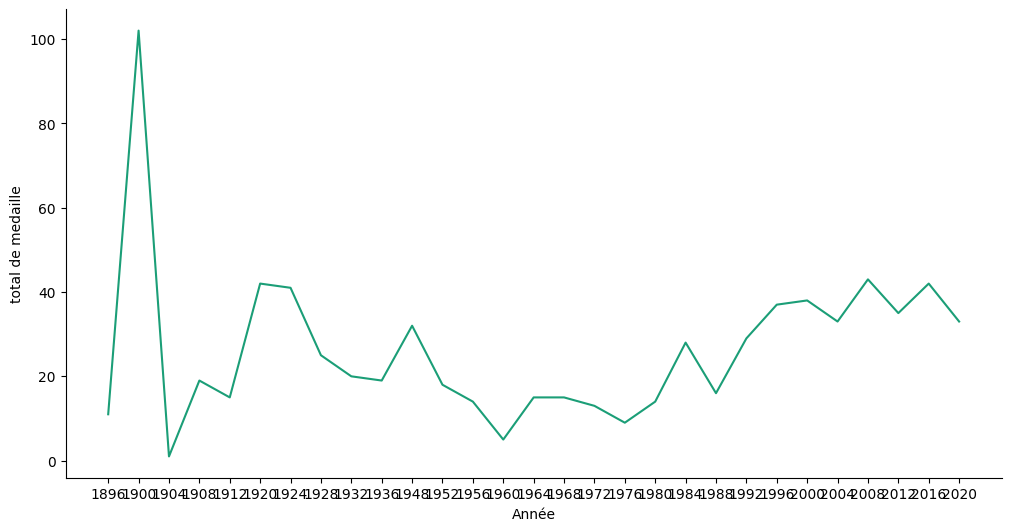

In [16]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['total_medaille']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data_for_france.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Année')
_ = plt.ylabel('total de medaille')

Ici nous avons un graphique représentant l'évolution des médailles que la France a gagné a chaque compétition.

In [17]:
train_data, test_data, train_target, test_target = train_test_split(
    data_for_france[['year']], data_for_france['total_medaille'], test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(train_data, train_target)

predictions = model.predict(test_data)

next_year = 2024

prediction_next_JO = model.predict([[next_year]])
print(f'Prédiction pour les JO {next_year}: {prediction_next_JO[0]} médailles')


Prédiction pour les JO 2024: 35.16763702067857 médailles


C:\dev\bigdata_ia\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


La prédiction concernant le nombre de médailles que la France devrait gagner lors des prochains JO est donc de 35.

In [18]:
features = ['year', 'country']
target = 'total_medaille'

train_data, test_data, train_target, test_target = train_test_split(
    data_from_db[features],
    data_from_db[target],
    test_size=0.2,
    random_state=42
)

model = RandomForestRegressor()
model.fit(train_data, train_target)

predictions = model.predict(test_data)


future_data = pd.DataFrame({'year': [2024], 'country_noc': ['FRA']})
future_predictions = model.predict(future_data)

predicted_countries = data_from_db[data_from_db['year'] == 2024]
predicted_countries['predicted_medals'] = model.predict(predicted_countries[features])
countries_with_at_least_2_medals = predicted_countries[predicted_countries['predicted_medals'] >= 2]

print('Pays avec au moins 2 médailles prédites pour les prochains JO :')
print(countries_with_at_least_2_medals[['country_noc', 'predicted_medals']])

ValueError: could not convert string to float: 'Yugoslavia'